In [39]:
!pip install seaborn
!pip3 install matplotlib==2.2.2

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 28})

In [4]:
kyoto_1_clickstream = pd.read_csv('dataset/data1_clickstream.csv', delimiter=',')
kyoto_1_clickstream['date'], kyoto_1_clickstream['time'] = kyoto_1_clickstream['eventtime'].str.split(' ', 1).str
kyoto_1_clickstream = kyoto_1_clickstream[['userid', 'date']]
kyoto_1_clickstream

,userid,date
0,ds125,2017-11-22
1,ds112,2017-11-22
2,ds104,2017-11-22
3,ds123,2017-11-22
4,ds126,2017-11-22
5,ds142,2017-11-22
6,ds112,2017-11-22
7,ds112,2017-11-22
8,ds142,2017-11-22
9,ds112,2017-11-22


In [5]:
#kyoto_1_score[kyoto_1_score['userid'] == 'ds125'].groupby['date'].size()
plot_df = kyoto_1_clickstream.groupby(['userid', 'date']).size().reset_index(name='counts')
plot_df

kyoto_engage = kyoto_1_clickstream.groupby(['date', 'userid']).size().reset_index(name='counts')
kyoto_engage
#for user in set(kyoto_1_score.userid):
#    kyoto_1_score

,date,userid,counts
0,2017-11-22,ds102,8
1,2017-11-22,ds103,454
2,2017-11-22,ds104,89
3,2017-11-22,ds106,267
4,2017-11-22,ds109,362
5,2017-11-22,ds112,377
6,2017-11-22,ds115,15
7,2017-11-22,ds118,207
8,2017-11-22,ds121,526
9,2017-11-22,ds122,116


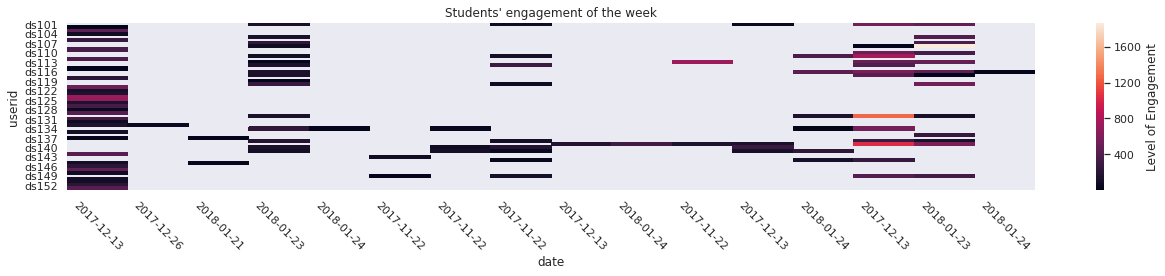

In [17]:
matplotlib.rcParams.update({'font.size': 12})
fig1, ax1 = plt.subplots(figsize=(18, 4))
ax1.set_title('Students\' engagement of the week')
pivot = plot_df.pivot(index='userid', columns='date', values='counts')

sns.set()
ax1 = sns.heatmap(pivot, cbar_kws={'label': 'Level of Engagement'})

plot_df['date'] = pd.to_datetime(plot_df['date'])
ax1.set_xticklabels(plot_df['date'].dt.strftime('%Y-%m-%d'), rotation=-45)
fig1.tight_layout()
fig1.savefig('./images/students_engagement_week.png', dpi=300)

![title](./images/students_engagement_week.png)

In [14]:
kyoto_1_score = pd.read_csv('dataset/data1_score.csv')
kyoto_x_all = pd.merge(plot_df, kyoto_1_score, on='userid')

NameError: name 'flights_missing' is not defined

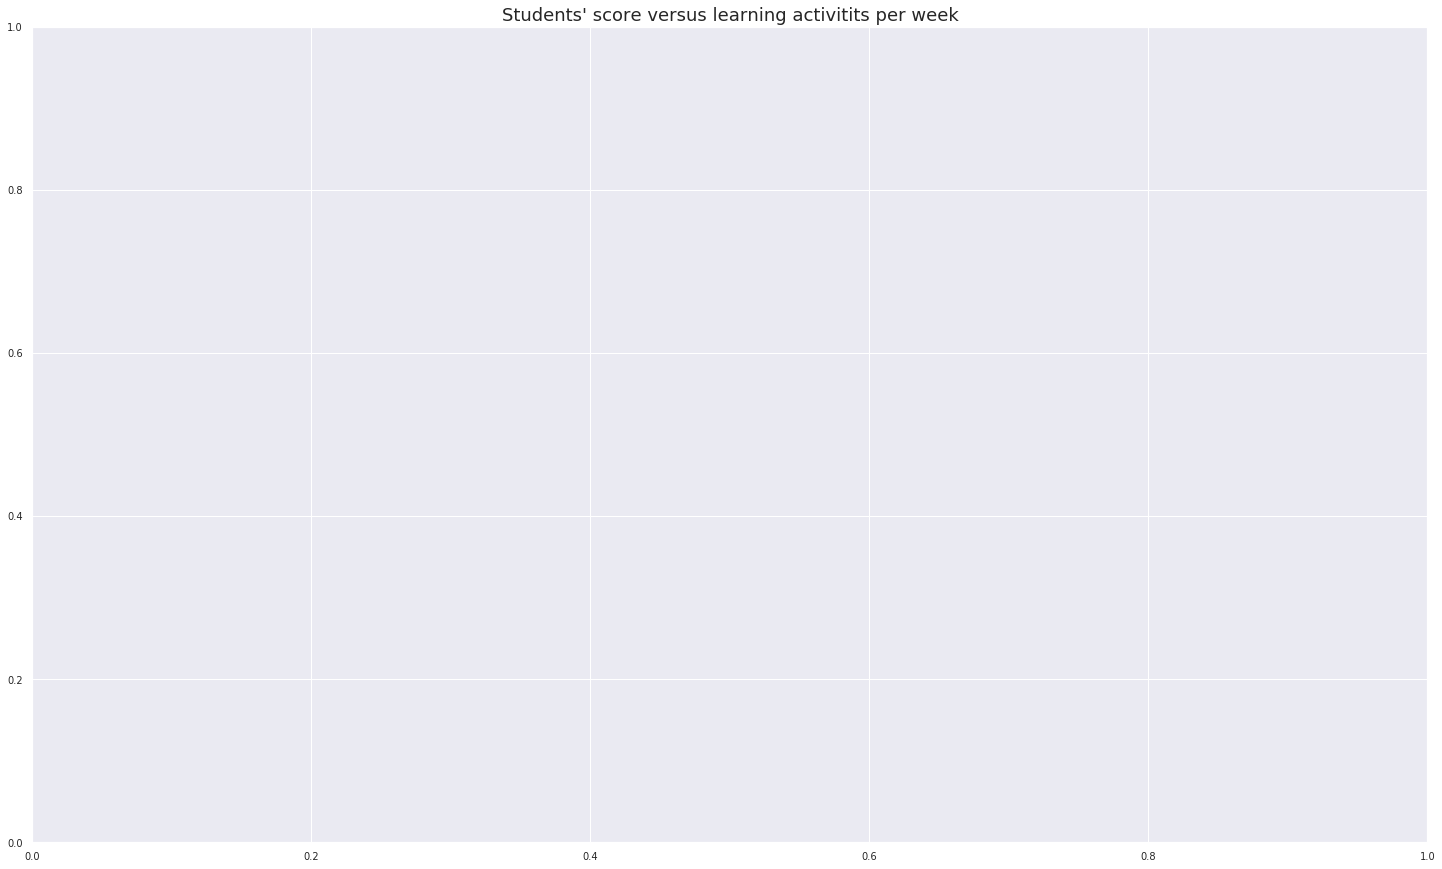

In [118]:

fig1, ax1 = plt.subplots(figsize=(25, 15))
ax1.set_title('Students\' score versus learning activitits per week', fontsize=18)
pivot = kyoto_x_all.pivot(index='userid', columns='date', values='score')

sns.set()
ax1 = sns.heatmap(pivot, cbar_kws={'label': 'Score'}, cmap='bwr', linewidths=1, linecolor='gray', mask=flights_missing.isnull())

sns.set(font_scale=0.9)

plot_df['date'] = pd.to_datetime(kyoto_x_all['date'])
ax1.set_xticklabels(kyoto_x_all['date'].dt.strftime('%Y-%m-%d'), rotation=-45, fontsize=18)
fig1.tight_layout()
fig1.savefig('./images/students_score_week.png', dpi=300)

In [108]:
sns.set(style='white')

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
    ax = plt.gca()
    print(x)
    ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
              fontweight='bold')

def cor_matrix(df):
    g = sns.PairGrid(df, palette=['red'])
    
  # Use normal regplot as `lowess=True` doesn't provide CIs.
    g.map_upper(sns.regplot, scatter_kws={'s':10})
    g.map_diag(sns.distplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_lower(corrfunc)
    g.map_diag(annotate_colname)
  # Remove axis labels, as they're in the diagonals.
    for ax in g.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    return g

/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


[  0   0   1   1   2   0   1   2   0   3   0   0   0   0   0   0   0   0
   0   1   0   0 106   0   1   0   0   2   0   0   2   0   0   1   0   1
   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   1]


/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.4/dist-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


AttributeError: 'numpy.ndarray' object has no attribute 'name'

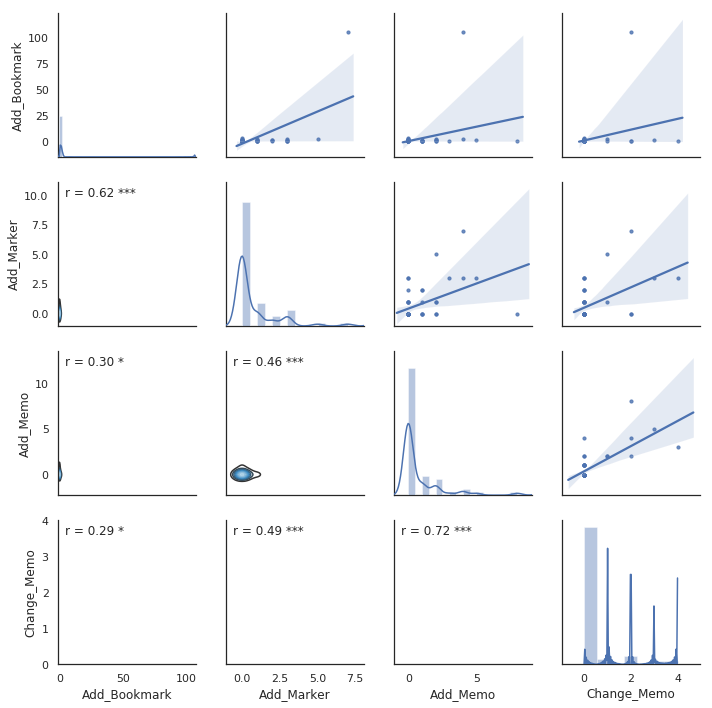

In [71]:
kyoto_1_x = pd.read_csv('dataset/dataset2_15features.csv')
kyoto_1_x = kyoto_1_x.drop(['Score'], axis=1)
kyoto_1_x.rename(index=str, columns={"Userid": "userid"}, inplace=True)
# kyoto_1_x = pd.merge(kyoto_1_x, kyoto_1_score, on='userid')
kyoto_1_x = kyoto_1_x.drop(['userid', 'Delete_Memo'], axis=1)
#print(list(kyoto_1_x))
cor_matrix(kyoto_1_x[list(kyoto_1_x)[0:4]])

#kyoto_1_x.plot.scatter

<Figure size 1080x1080 with 0 Axes>

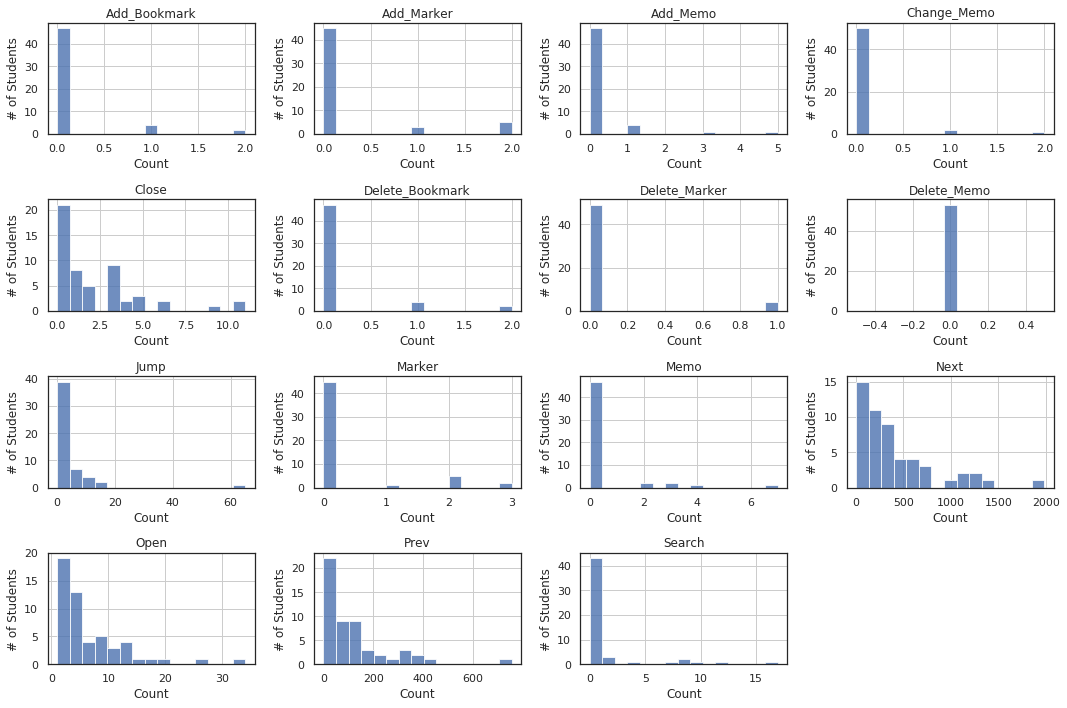

In [81]:

kyoto_1_x = pd.read_csv('dataset/dataset1_15features.csv')
kyoto_1_x = kyoto_1_x.drop(['Score', 'Userid'], axis=1)
#kyoto_1_x.rename(index=str, columns={"Userid": "userid"}, inplace=True)

plt.figure(figsize=(15, 15))
ax = kyoto_1_x.hist(alpha=0.8, bins=15, figsize=(15, 10))
#for x in ax:
#     x.set_title('x')

for array in ax:
    for subplot in array:
        subplot.set_ylabel('# of Students')
        subplot.set_xlabel('Count')

plt.tight_layout()
plt.savefig('./images/feature_dist.png', dpi=300)

<Figure size 1080x1080 with 0 Axes>

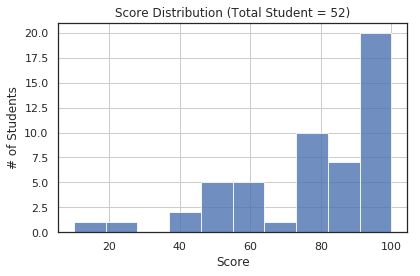

In [86]:
kyoto_1_x = pd.read_csv('dataset/dataset1_15features.csv')
kyoto_1_x = kyoto_1_x[kyoto_1_x['Score']>0]

plt.figure(figsize=(15, 15))
ax = kyoto_1_x.hist(column='Score', grid=True, alpha=0.8)
ax[0][0].set_ylabel('# of Students')
ax[0][0].set_xlabel('Score')
ax[0][0].set_title('Score Distribution (Total Student = 52)')
#plt.legend(['Training'])

plt.tight_layout()
plt.savefig('./images/score_dist.png', dpi=300)